In [11]:
import pandas as pd

In [13]:
file_path = r'C:\Users\User\Documents\final project DS course\hospital_table_3.csv'

In [15]:
df = pd.read_csv(file_path)

In [17]:
df.head()

,Date,hospitalized,% hospitalized women,avg age hospitalized,respirated,% women on a respirator,avg age on a respirator,% unvaccinated on a respirator,mild sick,%mild sick women,% mild sick unvaccinated,avg mild sick,moderate sick,% women moderate sick,unvaccinated moderate sick,avg age moderate sick,critical sick,% critical sick women,% unvaccinated critical sick,avg age critical sick
0,2020-03-11,79,45.6,47.8,7.0,40.0,63.8,100.0,72.0,45.8,100.0,46.2,0.0,0.0,0.0,0.0,6.0,50.0,100.0,67.3
1,2020-03-12,102,49.0,49.9,2.0,40.0,63.8,100.0,95.0,49.5,100.0,48.9,0.0,0.0,0.0,0.0,1.0,50.0,100.0,67.3
2,2020-03-13,120,47.5,49.2,8.0,40.0,63.8,100.0,109.0,47.7,100.0,47.3,6.0,40.0,100.0,68.0,3.0,50.0,100.0,67.3
3,2020-03-14,158,49.4,47.4,12.0,0.0,70.3,100.0,148.0,50.7,100.0,45.7,2.0,40.0,100.0,68.0,10.0,20.0,100.0,76.8
4,2020-03-15,197,51.8,46.5,6.0,20.0,74.0,100.0,183.0,52.5,100.0,44.6,10.0,50.0,100.0,61.3,8.0,37.5,100.0,79.0


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [41]:
print(df.head())

         Date  hospitalized  % hospitalized women  avg age hospitalized  \
0  2020-03-11            79                  45.6                  47.8   
1  2020-03-12           102                  49.0                  49.9   
2  2020-03-13           120                  47.5                  49.2   
3  2020-03-14           158                  49.4                  47.4   
4  2020-03-15           197                  51.8                  46.5   

   respirated  % women on a respirator  avg age on a respirator  \
0         7.0                     40.0                     63.8   
1         2.0                     40.0                     63.8   
2         8.0                     40.0                     63.8   
3        12.0                      0.0                     70.3   
4         6.0                     20.0                     74.0   

   % unvaccinated on a respirator  mild sick  %mild sick women  \
0                           100.0       72.0              45.8   
1             

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['hospitalizations_scaled'] = scaler.fit_transform(df[['hospitalized']]) 
#df is your DataFrame, and hospitalized is the column with the number of hospitalized patients.
scaled_data_df = df # Renaming or reassigning the DataFrame
#hospitalizations_scaled is the scaled column, with values between 0 and 1

In [23]:
print(scaled_data_df.head())

         Date  hospitalized  % hospitalized women  avg age hospitalized  \
0  2020-03-11            79                  45.6                  47.8   
1  2020-03-12           102                  49.0                  49.9   
2  2020-03-13           120                  47.5                  49.2   
3  2020-03-14           158                  49.4                  47.4   
4  2020-03-15           197                  51.8                  46.5   

   respirated  % women on a respirator  avg age on a respirator  \
0         7.0                     40.0                     63.8   
1         2.0                     40.0                     63.8   
2         8.0                     40.0                     63.8   
3        12.0                      0.0                     70.3   
4         6.0                     20.0                     74.0   

   % unvaccinated on a respirator  mild sick  %mild sick women  ...  \
0                           100.0       72.0              45.8  ...   
1   

In [25]:
import numpy as np

# Function to create sequences

def create_sequences(scaled_data_df, sequence_length):
    x, y = [], []
    for i in range(len(scaled_data_df) - sequence_length):
        x.append(scaled_data_df[i:i + sequence_length]) # Input sequence
        y.append(scaled_data_df[i + sequence_length]) # Target value
    return np.array(x), np.array(y).reshape(-1, 1)


# Extract the scaled column as a NumPy array and reshape
hospitalizations_scaled = scaled_data_df['hospitalizations_scaled'].values.reshape(-1, 1)


# Define sequence length
sequence_length = 30  # Use the past 30 days to predict the next day

# Create sequences
x, y = create_sequences(hospitalizations_scaled, sequence_length)

# Check shapes
print(f"x shape: {x.shape}, y shape: {y.shape}")

x shape: (1428, 30, 1), y shape: (1428, 1)


In [27]:
print(hospitalizations_scaled.shape)

(1458, 1)


In [29]:
print(f"x shape: {x.shape}, y shape: {y.shape}")

x shape: (1428, 30, 1), y shape: (1428, 1)


In [31]:
# Define training size (e.g., 80% for training)
train_size = int(len(x) * 0.8)

# Split into training and testing datasets
x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

# Check shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (1142, 30, 1), y_train shape: (1142, 1)
x_test shape: (286, 30, 1), y_test shape: (286, 1)


In [ ]:
#Step 4: Build and Train the LSTM Model

In [33]:
#Import Necessary Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
#Build the LSTM Model

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0180 - val_loss: 5.0495e-04
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018 - val_loss: 2.8732e-04
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.7555e-04 - val_loss: 2.7269e-04
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.4422e-04 - val_loss: 9.9965e-05
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.0540e-04 - val_loss: 7.4513e-05
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.8554e-04 - val_loss: 6.3401e-05
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.6495e-04 - val_loss: 4.1251e-05
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.1046e-04 - val_loss: 1.1097e-04
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.1463e-04 - val_loss: 9.8622e-05
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.9176e-04 - val_loss: 1.1570e-04


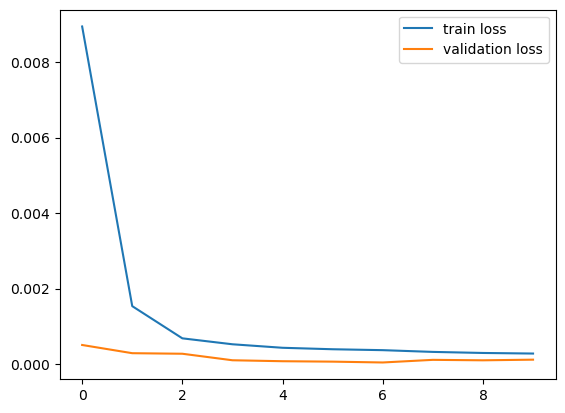

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])))
#units=50: The number of LSTM units (neurons). You can experiment with different numbers, but 50 is a common starting point.
#return_sequences=False: We don’t need to return the full sequence of outputs from the LSTM, just the final output.
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
#epochs=10: The number of times the model will train on the entire dataset. 
#batch_size=32: The number of samples per gradient update

# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025     
Test loss: 0.003651668084785342
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


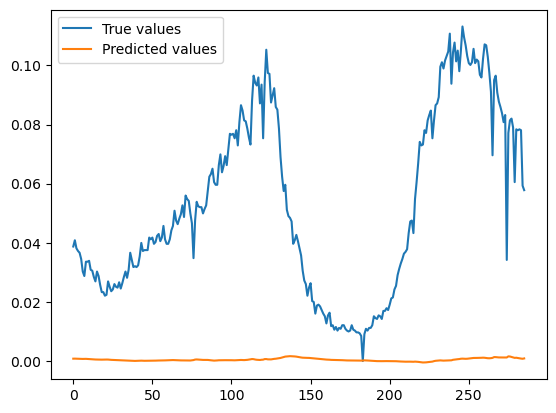

In [41]:
#Evaluate and Predict

# Evaluate the model
test_loss = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')

# Make predictions
predictions = model.predict(x_test)

# Plot predictions vs true values (optional)
plt.plot(y_test, label='True values')
plt.plot(predictions, label='Predicted values')
plt.legend()
plt.show()

In [43]:
test_loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025    
Test Loss: 0.003651668084785342


In [ ]:
Test Loss: 0.00365
Since your data is scaled between 0 and 1, a test loss of 0.00365 seems quite good. Here's why:
#Small Loss Value:
The value 0.00365 is relatively small. In regression problems with scaled data, test loss values typically range from 0.001 to 0.1. This means your model is making reasonably accurate predictions, with the mean squared error (MSE) being very low.
#Interpretation of Loss:
Since your data is between 0 and 1 (due to the MinMax scaling), a loss of around 0.003 means that the model's predictions deviate from the actual values by, on average, 0.00365 squared. This is a small difference, so your model is performing well.
#How Good Is This?
If we assume the actual hospitalizations are also scaled between 0 and 1, then the predicted values are close to the true values with a minimal error.
You could further evaluate performance by calculating the Root Mean Squared Error (RMSE) (which is the square root of the MSE). This might give you an even easier-to-interpret measure of error in the same units as your original data (between 0 and 1).

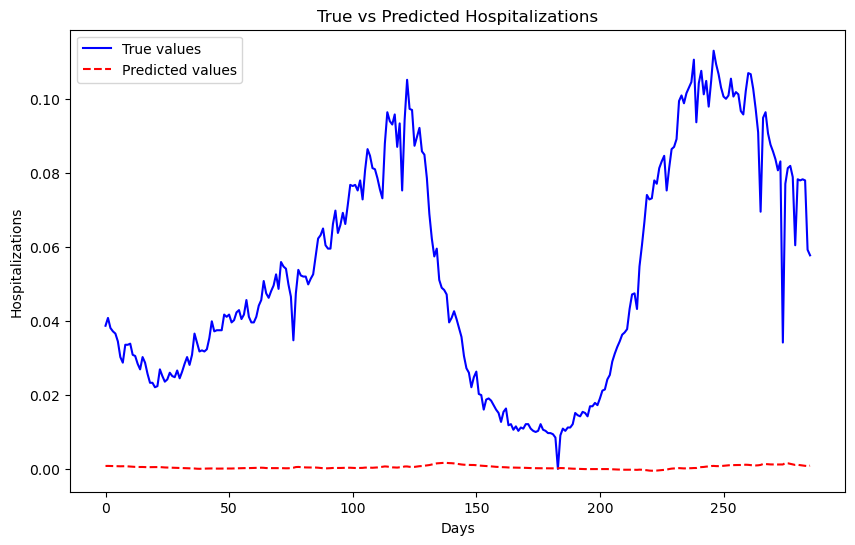

In [47]:
import matplotlib.pyplot as plt

# Assuming y_test is the true values and predictions are the predicted values from the model
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(predictions, label='Predicted values', color='red', linestyle='--')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Hospitalizations')
plt.title('True vs Predicted Hospitalizations')
plt.show()